In [1]:
import seaborn

In [2]:
import matplotlib

In [5]:
! pip install scikit-learn

   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB 435.7 kB/s eta 0:00:26
   ---------------------------------------- 0.1/10.9 MB 409.6 kB/s eta 0:00:27
   ---------------------------------------- 0.1/10.9 MB 525.1 kB/s eta 0:00:21
   ---------------------------------------- 0.1/10.9 MB 554.9 kB/s eta 0:00:20
    --------------------------------------- 0.2/10.9 MB 737.3 kB/s eta 0:00:15
    --------------------------------------- 0.2/10.9 MB 692.4 kB/s eta 0:00:16
    --------------------------------------- 0.2/10.9 MB 692.4 kB/s eta 0:00:16
    --------------------------------------- 0.2/10.9 MB 692.4 kB/s eta 0:00:16
    --------------------------------------- 0.2/10.9 MB 692.4 kB/s eta 0:00:16
   - -------------------------------------- 0.3/10.9 MB 587.7 kB/s eta 0:00:19



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


In [7]:
import pandas as pd

In [4]:
df = pd.read_csv(r'C:\Users\ADMIN\Downloads\chip_dataset.csv')



In [5]:
df

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,NVIDIA GeForce RTX 3050 6 GB,GPU,NaN,8,80,200,8700,1042.0,Samsung,NVIDIA,6021.0,6021.0,94.08
4941,NVIDIA GeForce RTX 4070 SUPER,GPU,1/8/24,5,220,294,35800,1980.0,TSMC,NVIDIA,35480.0,35480.0,554.40
4942,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,1/8/24,5,285,379,45900,2340.0,TSMC,NVIDIA,44100.0,44100.0,689.00
4943,NVIDIA GeForce RTX 4080 SUPER,GPU,1/8/24,5,320,379,45900,2295.0,TSMC,NVIDIA,52220.0,52220.0,816.00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1. Explore the missingness in the dataset:



In [11]:
missing_values = df.isnull().sum()
missing_percentages = 100 * missing_values / len(df)

missing_table = pd.concat([missing_values, missing_percentages], axis=1, keys=['Missing Values', 'Percentage'])
print(missing_table)


                       Missing Values  Percentage
Product                             0    0.000000
Type                                0    0.000000
Release Date                      199    4.024267
Process Size (nm)                   0    0.000000
TDP (W)                           437    8.837209
Die Size (mm^2)                   352    7.118301
Transistors (million)             555   11.223458
Freq (GHz)                        437    8.837209
Foundry                           615   12.436805
Vendor                              0    0.000000
FP16 GFLOPS                      4145   83.822042
FP32 GFLOPS                      3260   65.925177
FP64 GFLOPS                      3667   74.155713


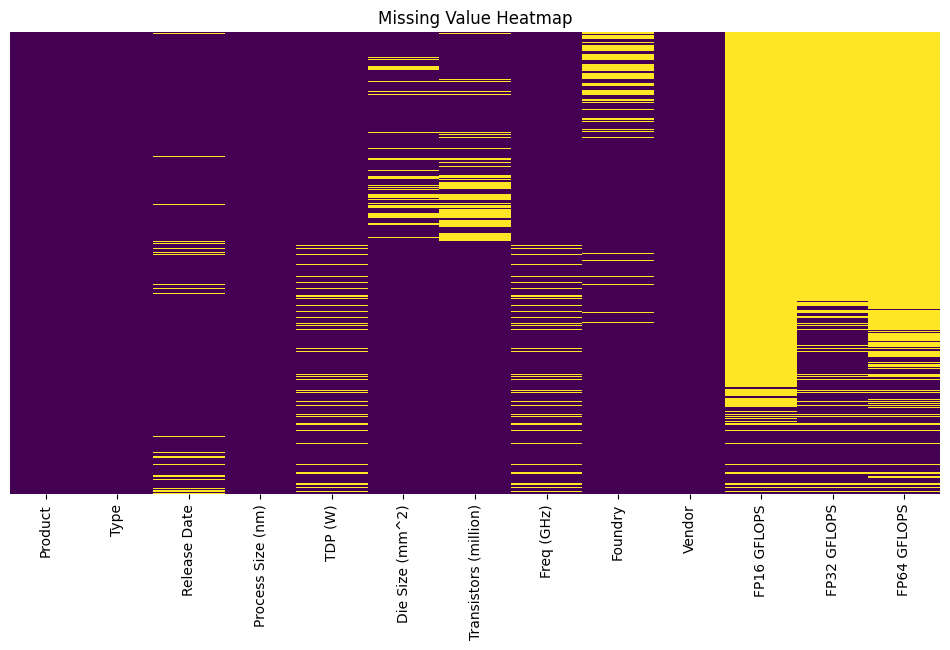

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

2. Develop a strategy to deal with missing values:
3. Drop non-consequntial fields
4. Transform temporal data to their corrrect format (date time)




In [13]:
df['Release Date'] = pd.to_datetime(df['Release Date'])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8952\629868680.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


In [15]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')


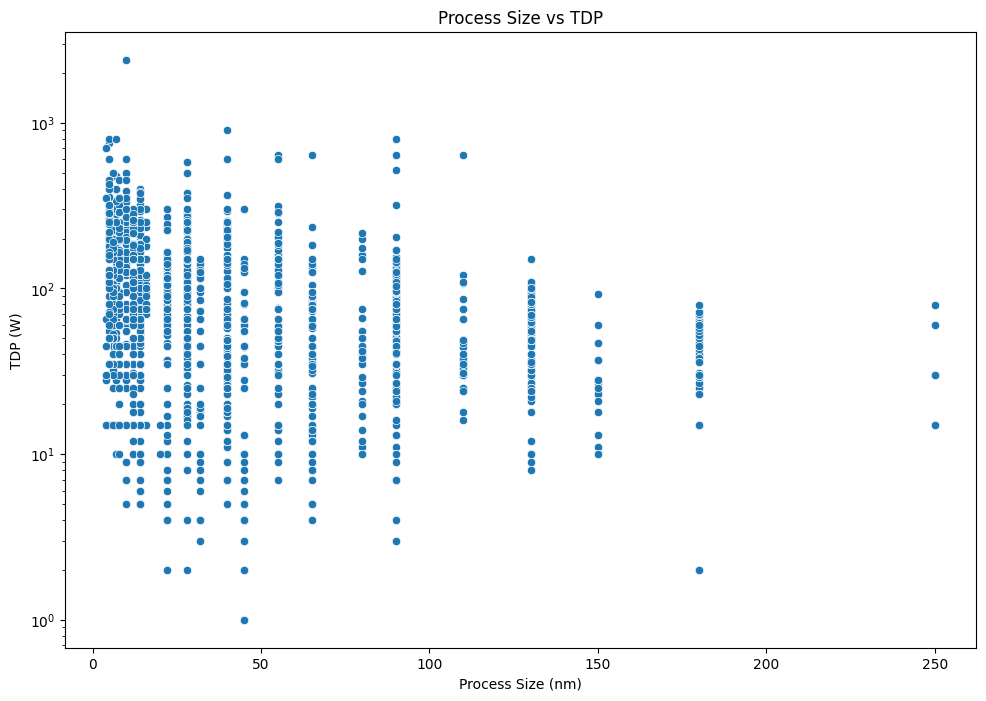

In [36]:
plt.figure(figsize=(40,8))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Process Size (nm)', y='TDP (W)')
plt.title('Process Size vs TDP')
plt.yscale('log')



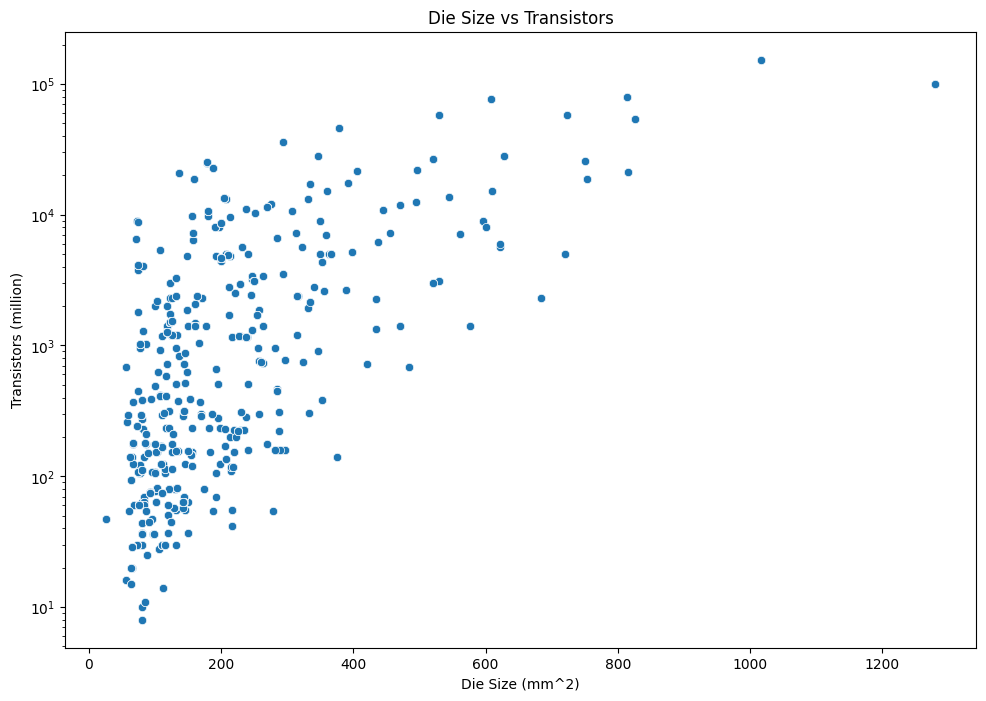

In [35]:
plt.figure(figsize=(40,8))

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Die Size (mm^2)', y='Transistors (million)')
plt.title('Die Size vs Transistors')
plt.yscale('log')





Text(0.5, 1.0, 'Frequency vs FP32 GFLOPS')

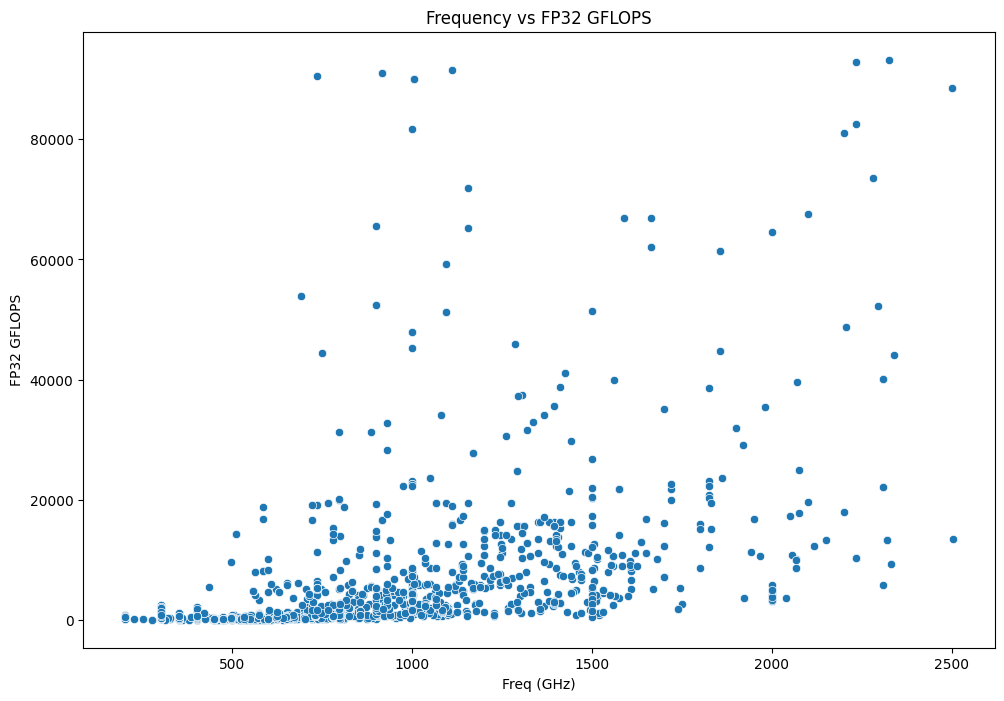

In [24]:
plt.figure(figsize=(40,8))

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Freq (GHz)', y='FP32 GFLOPS')
plt.title('Frequency vs FP32 GFLOPS')


5. Perfom a full EDA and demonstrate the validity of the following assumptions
* Moore's Law still holds, especially in GPUs.
* Dannard Scaling is still valid in general.
* CPUs have higher frequencies, but GPUs are catching up.
* GPU performance doubles every 1.5 years.
* GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.
* High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.
* Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data Cleaning and Preprocessing
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
numeric_columns = ['Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (GHz)', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS']
for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df['Foundry'].fillna('Unknown', inplace=True)
df['Vendor'].fillna('Unknown', inplace=True)



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8952\267694010.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Foundry'].fillna('Unknown', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8952\267694010.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [30]:
# Create a 'Product Category' column
df['Product Category'] = df['Product'].apply(lambda x: 'GPU' if 'GPU' in x else ('CPU' if 'CPU' in x else 'Other'))

# Basic Statistics
print(df.describe())

                        Release Date  Process Size (nm)      TDP (W)  \
count                           4945        4887.000000  4054.000000   
mean   2012-09-04 02:26:19.777553152          51.304072    92.539714   
min              1999-03-15 00:00:00           0.000000     1.000000   
25%              2007-05-27 00:00:00          14.000000    35.000000   
50%              2012-09-04 12:00:00          32.000000    65.000000   
75%              2018-02-12 00:00:00          80.000000   119.000000   
max              2024-01-08 00:00:00         250.000000  2400.000000   
std                              NaN          48.497938    97.469175   

       Die Size (mm^2)  Transistors (million)   Freq (GHz)    FP16 GFLOPS  \
count      4229.000000            4139.000000  4508.000000     800.000000   
mean        212.972443            4836.373762  1615.430790   19033.061063   
min           6.000000               8.000000   100.000000      10.020000   
25%         114.000000             163.5000

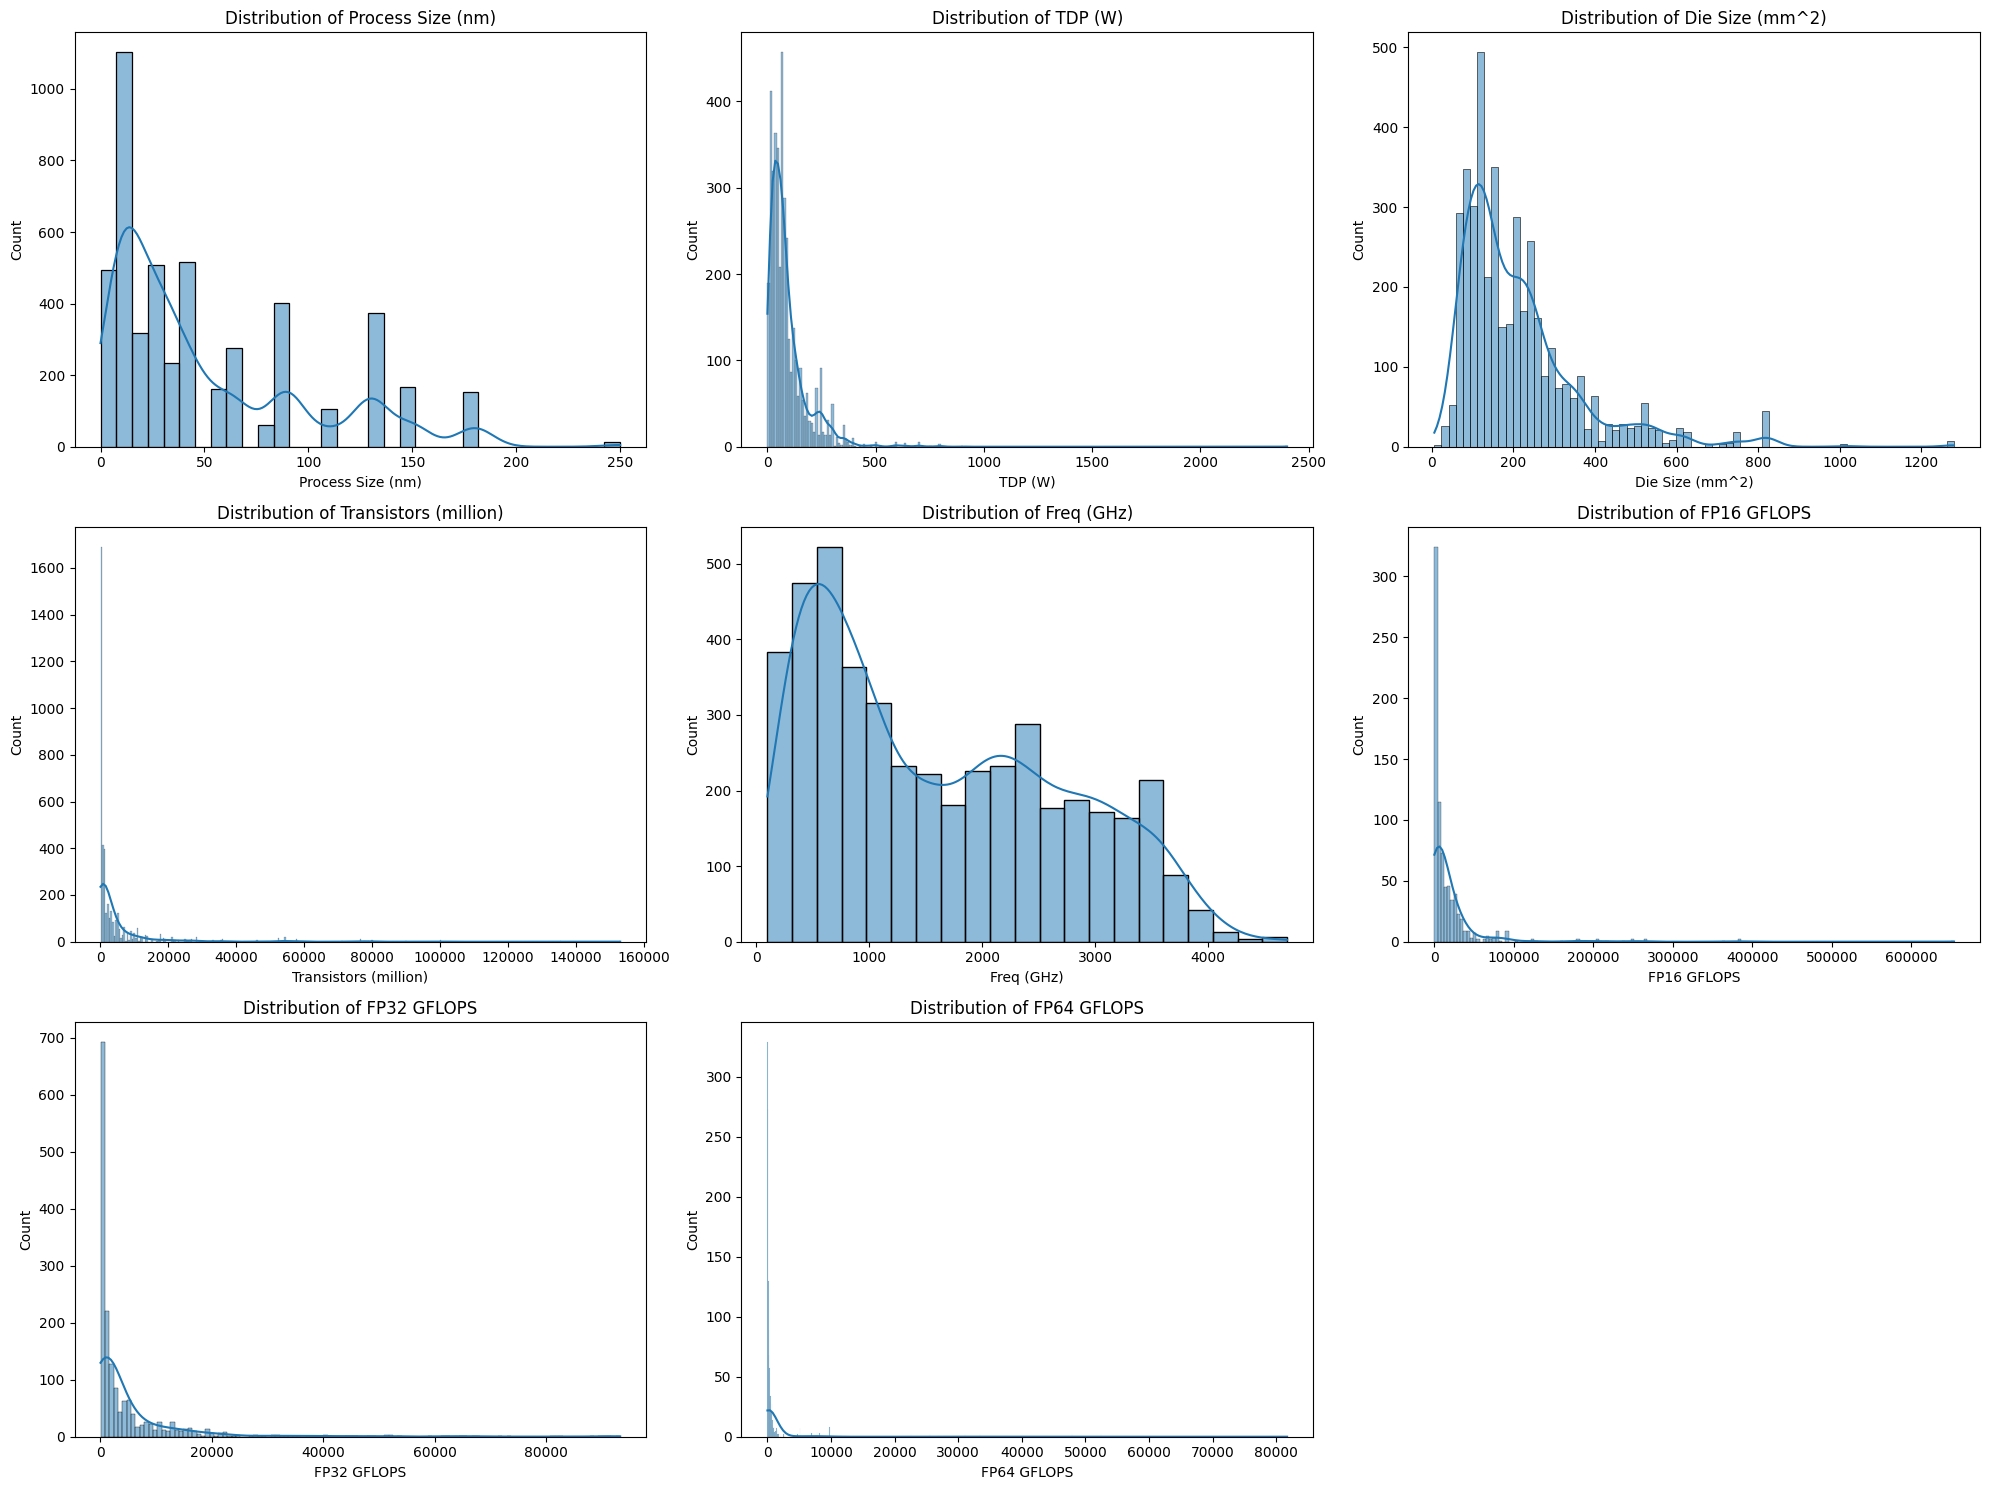

In [31]:
# Distribution Analysis
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show() 

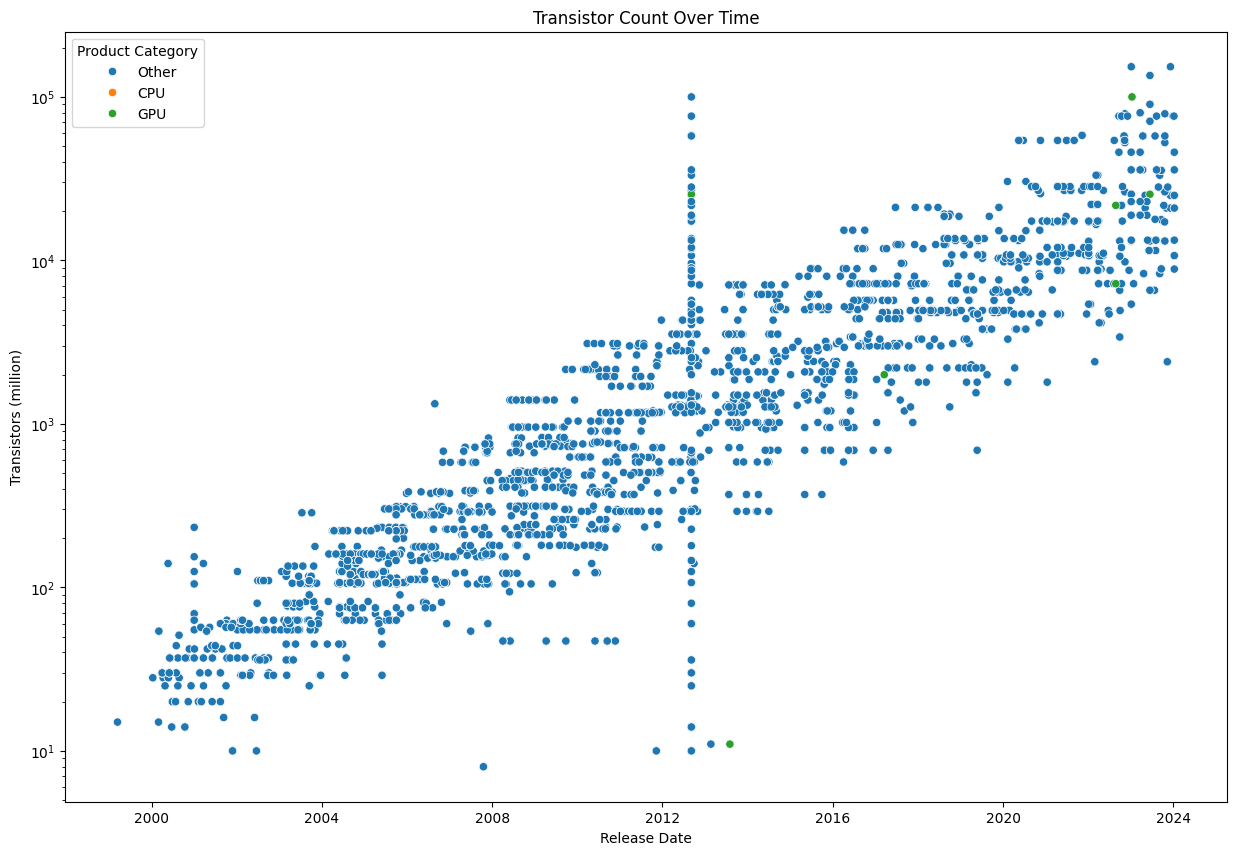

In [32]:
# Trend Analysis
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='Release Date', y='Transistors (million)', hue='Product Category')
plt.title('Transistor Count Over Time')
plt.yscale('log')
plt.show()

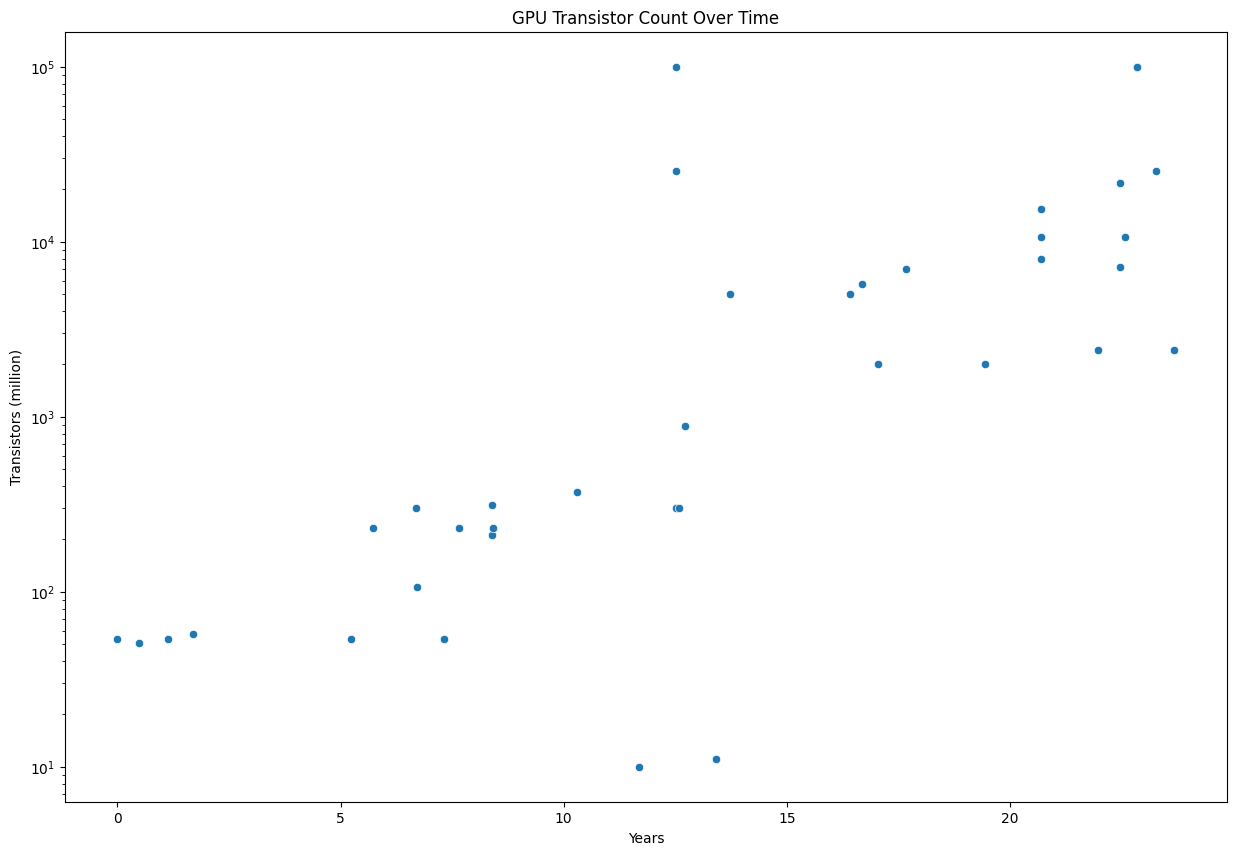

In [33]:
#1. Moore's Law for GPUs

gpu_data = df[df['Product Category'] == 'GPU'].sort_values('Release Date')
gpu_data['Years'] = (gpu_data['Release Date'] - gpu_data['Release Date'].min()).dt.total_seconds() / (365.25 * 24 * 60 * 60)
plt.figure(figsize=(15, 10))
sns.scatterplot(data=gpu_data, x='Years', y='Transistors (million)')
plt.title("GPU Transistor Count Over Time")
plt.yscale('log')
plt.show()

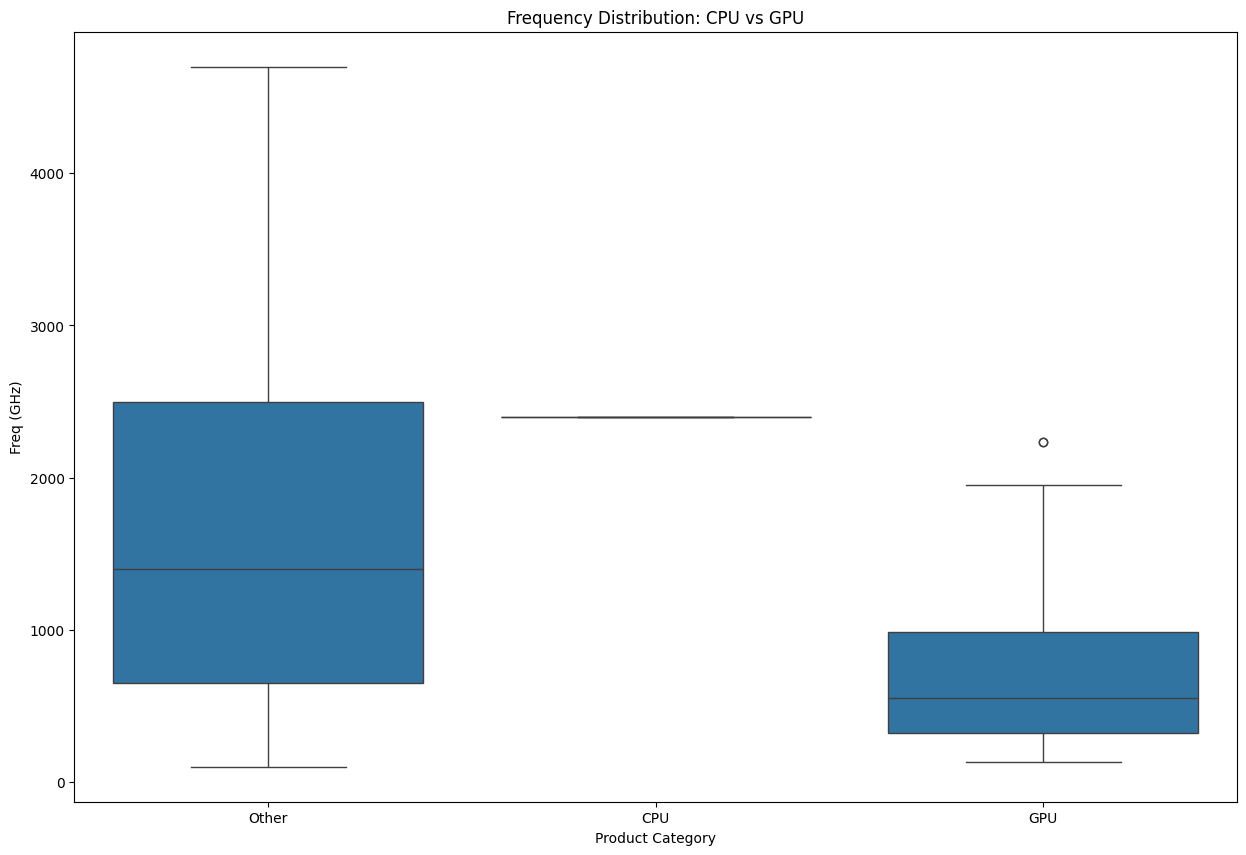

In [34]:
# CPU vs GPU Frequency
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='Product Category', y='Freq (GHz)')
plt.title('Frequency Distribution: CPU vs GPU')
plt.show()


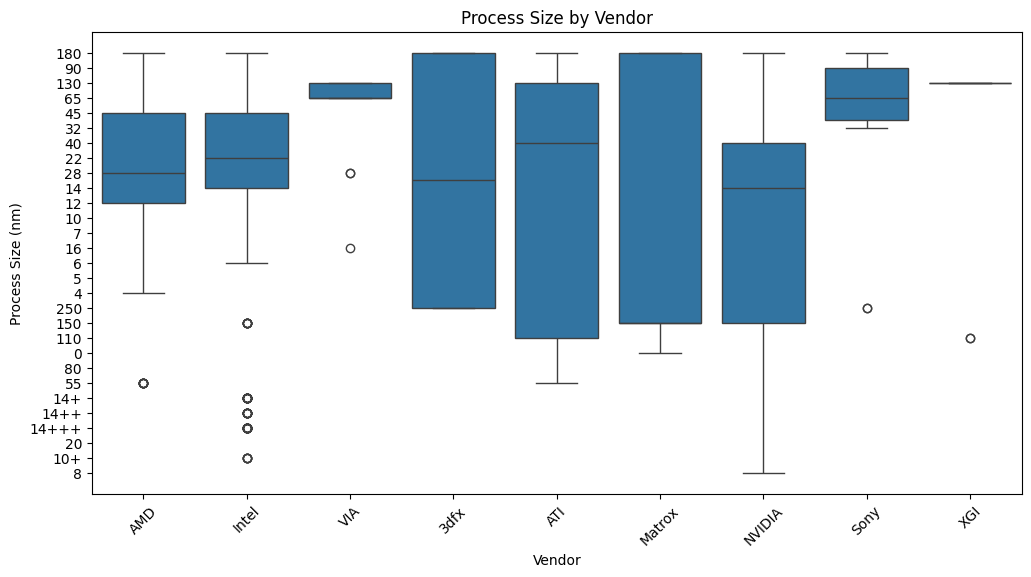

In [23]:
#3. Process Size by Vendor
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vendor', y='Process Size (nm)', data=df)
plt.title('Process Size by Vendor')
plt.xticks(rotation=45)
plt.show()

* TSMC makes the highest number of chips in the world
1. Calculate and visualized the correlation among the features
2. Perfom the correct encoding for your data, in readiness for modelling.



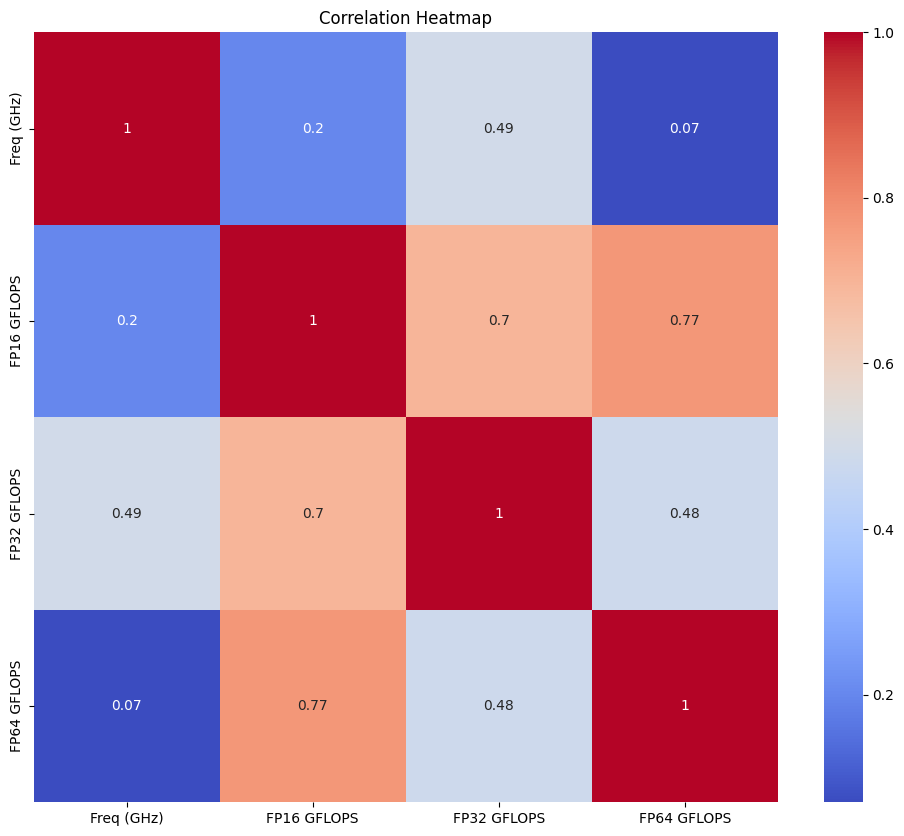

In [24]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [38]:
# Convert Release Date to datetime and extract useful features
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Release Year'] = df['Release Date'].dt.year
df['Release Month'] = df['Release Date'].dt.month


In [39]:
# Identify column types
numeric_features = ['Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 
                    'Freq (GHz)', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS', 'Release Year', 'Release Month']
categorical_features = ['Product', 'Foundry', 'Vendor']


In [40]:
# Create a copy of the dataframe for encoding
df_encoded = df.copy()

# Handle missing values in numeric columns
for col in numeric_features:
    df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')


In [43]:
# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [44]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [45]:
# Fit and transform the data
X_encoded = preprocessor.fit_transform(df_encoded)


In [51]:
# Get feature names after encoding
onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = onehot_encoder.get_feature_names_out(categorical_features).tolist()
feature_names = numeric_features + cat_feature_names


In [52]:
# Convert to dataframe
df_model_ready = pd.DataFrame(X_encoded.toarray(), columns=feature_names)

# Print the first few rows of the encoded dataframe
print(df_model_ready.head())

# Print info about the encoded dataframe
print(df_model_ready.info())

# Save the encoded dataframe
df_model_ready.to_csv('encoded_data.csv', index=False)

   Process Size (nm)   TDP (W)  Die Size (mm^2)  Transistors (million)  \
0           2.671826 -0.377811         -0.61479              -0.376143   
1           2.671826 -0.377811         -0.61479              -0.376143   
2           2.671826 -0.310300         -0.61479              -0.376143   
3           2.671826 -0.276544         -0.61479              -0.376143   
4           2.671826 -0.242788         -0.61479              -0.376143   

   Freq (GHz)  FP16 GFLOPS  FP32 GFLOPS  FP64 GFLOPS  Release Year  \
0   -0.574949    -0.111876    -0.202562    -0.092186     -1.891328   
1   -0.574949    -0.111876    -0.202562    -0.092186     -1.891328   
2   -0.478545    -0.111876    -0.202562    -0.092186     -1.891328   
3   -0.446731    -0.111876    -0.202562    -0.092186     -1.891328   
4   -0.382140    -0.111876    -0.202562    -0.092186     -1.891328   

   Release Month  ...  Foundry_Unknown  Vendor_3dfx  Vendor_AMD  Vendor_ATI  \
0      -0.348768  ...              1.0          0.0    